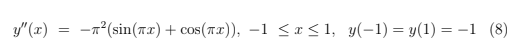

In [41]:
from math import factorial as fac
from math import sin, cos, pi

In [48]:
def r(x):
    return -pi**2*(sin(pi*x) + cos(pi*x))

In [9]:
def binom(a, b):
    return fac(a)/(fac(b)*fac(a - b))

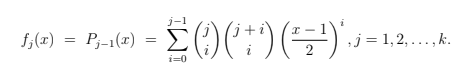

In [105]:
def legendre_pol(index, x):
    return sum([binom(index, i)*binom(index+i, i)*((x - 1)/2)**i for i in range(index+1)])

In [39]:
x_given = 0.7688
for i in range(0, 11):
    print(f'P_{i} = {legendre_pol(i, x_given)}')

P_0 = 1.0
P_1 = 0.7688
P_2 = 0.38658016000000006
P_3 = -0.017195288319999863
P_4 = -0.3130696609057276
P_5 = -0.4194820888917828
P_6 = -0.3303546374685648
P_7 = -0.11211483648073199
P_8 = 0.1274467709980197
P_9 = 0.28473300112016964
P_10 = 0.30121309549804387


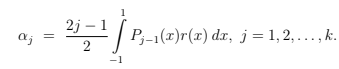

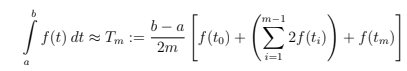

In [133]:
def integral_trapezoidal(f, a, b, n):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h

In [129]:
initial = -1
final = 1
num_divs = 10000

def get_alfa(k):
    return (2*k - 1)/2*integral_trapezoidal(lambda x: r(x)*legendre_pol(k-1, x), initial, final, num_divs)

In [134]:
for i in range(1, 10):
    print(f'α_{i} = {get_alfa(i)}')

α_1 = 4.621192317699751e-16
α_2 = -9.424777650706595
α_3 = 15.000000493480254
α_4 = 11.431390197649232
α_5 = -5.748515581127785
α_6 = -2.1642999434215944
α_7 = 0.6525329066146618
α_8 = 0.16425414113053774
α_9 = -0.03549414764834449


In [154]:
def legendre_2_linhas(index, x):
    return sum([binom(index, i)*binom(index+i, i)*((x - 1)/2)**(i + 2)*4/((i+1)*(i+2)) for i in range(index+1)])

In [192]:
def F_grande(x, k):
    return sum([get_alfa(i)*legendre_2_linhas(k-1, x) for i in range(1,k+1)]) 

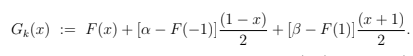

In [190]:
def G_k(x, k):
    return F_grande(x, k) + (-1 - F_grande(-1, k))*(1 - x)/2 + (-1 - F_grande(1, k))*(x + 1)/2

In [191]:
G_k(0, 4)

-1.0